# Python Visualization

We mainly use seaborn to draw plots on Python.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

We load iris data from packge sklearn. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Both Python and R has the access to this dataset.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris
df = pd.DataFrame(iris['data'], columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
cg = pd.DataFrame(iris['target'],columns=['Category'])

It is not as convenient to build the normal distribution of histplot in Python as in R. We need to build a function to construct the probability distribution function and use the function "lineplot" form seaborn to draw the line.

In [3]:
def normfun(x):
    mu = np.mean(x)
    sigma = np.std(x)
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

The distribution of one or more variables is represented by a histogram, a traditional visualization tool, by counting the number of data that fall within discrete bins. The distribution of observations in a dataset can be seen visually using a kernel density estimate (KDE) plot, which represents the data as a continuous probability density curve in one or more dimensions.

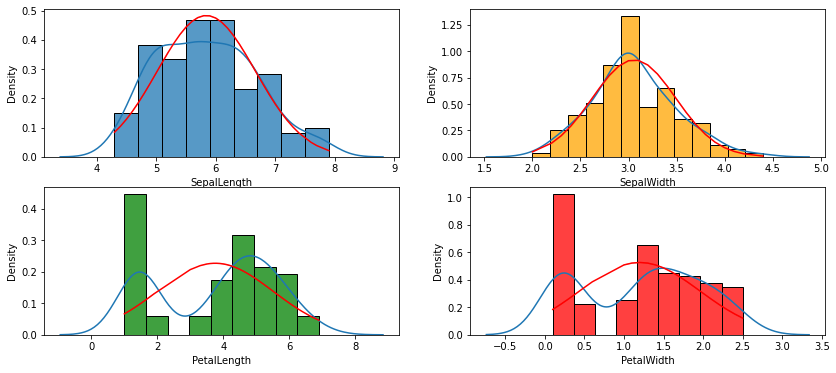

In [4]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(14,6))
axes = ax.flatten()
sns.histplot(data=df,x='SepalLength',stat='density',ax=axes[0])
sns.kdeplot(data=df,x='SepalLength',ax=axes[0])
sns.lineplot(data=df,x='SepalLength',y=normfun(df.SepalLength),ax=axes[0],color='red')
sns.histplot(data=df,x='SepalWidth',stat='density',color='orange',ax=axes[1])
sns.kdeplot(data=df,x='SepalWidth',ax=axes[1])
sns.lineplot(data=df,x='SepalWidth',y=normfun(df.SepalWidth),ax=axes[1],color='red')
sns.histplot(data=df,x='PetalLength',stat='density',color='green',ax=axes[2])
sns.kdeplot(data=df,x='PetalLength',ax=axes[2])
sns.lineplot(data=df,x='PetalLength',y=normfun(df.PetalLength),ax=axes[2],color='red')
sns.histplot(data=df,x='PetalWidth',stat='density',color='red',ax=axes[3])
sns.kdeplot(data=df,x='PetalWidth',ax=axes[3])
sns.lineplot(data=df,x='PetalWidth',y=normfun(df.PetalWidth),ax=axes[3],color='red')

In order to compare variables or levels of a categorical variable, a box plot illustrates the distribution of quantitative data. Except for points that are identified as "outliers", the box plot displays the dataset's quartiles, and the whiskers expand to display the remainder of the distribution.

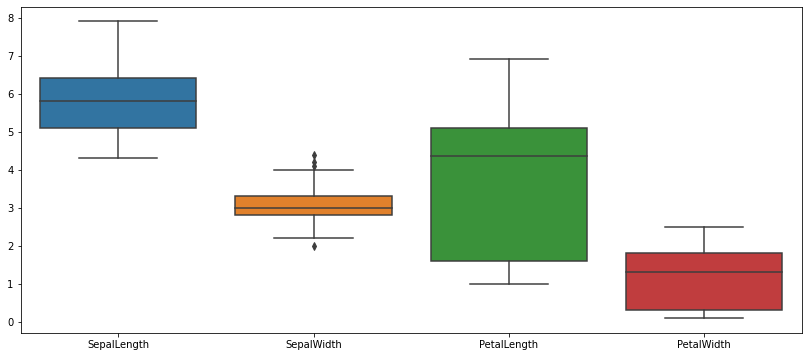

In [5]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)

similar with boxplot, violin plot is another method to compare variables or levels of a categorical variable.

[Text(0, 0, 'sepal length (cm)'),
 Text(0, 0, 'sepal width (cm)'),
 Text(0, 0, 'petal length (cm)'),
 Text(0, 0, 'petal width (cm)')]

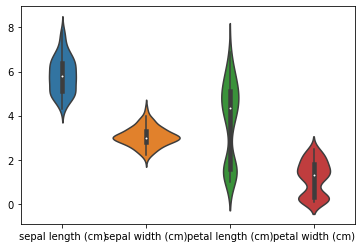

In [6]:
g1 = sns.violinplot(data = iris.data) 
g1.set_xticklabels(iris.feature_names)

[Text(0, 0, 'sepal length (cm)'),
 Text(0, 0, 'sepal width (cm)'),
 Text(0, 0, 'petal length (cm)'),
 Text(0, 0, 'petal width (cm)')]

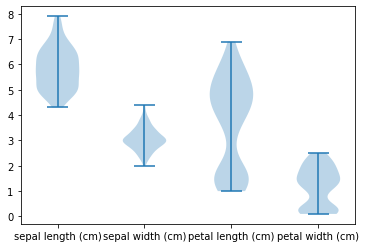

In [7]:
#vioplot using matplotlib
fig, ax = plt.subplots()
ax.violinplot(dataset = iris.data)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(iris.feature_names)

Scatter plot is most used for generally find a relationship between two numerical variables. The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters.

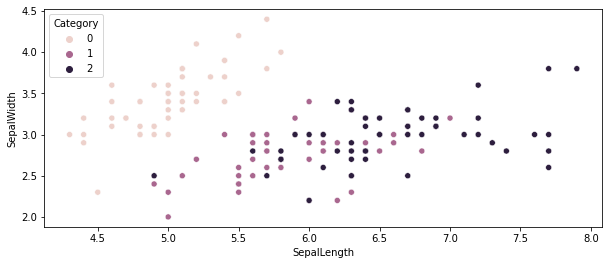

In [8]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df,x='SepalLength',y='SepalWidth',hue=cg.Category)

Heatmap can be used to analyze the relationship within the features. We can compute the correlation first and draw the plot. This is an Axes-level function

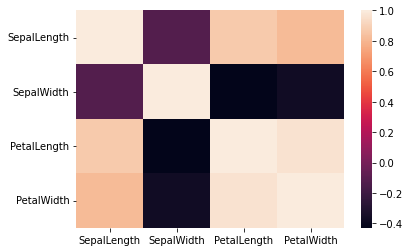

In [9]:
corr = df.corr()
sns.heatmap(corr)

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar graph can also be used to show multiple variables, the function uses the average value as default.

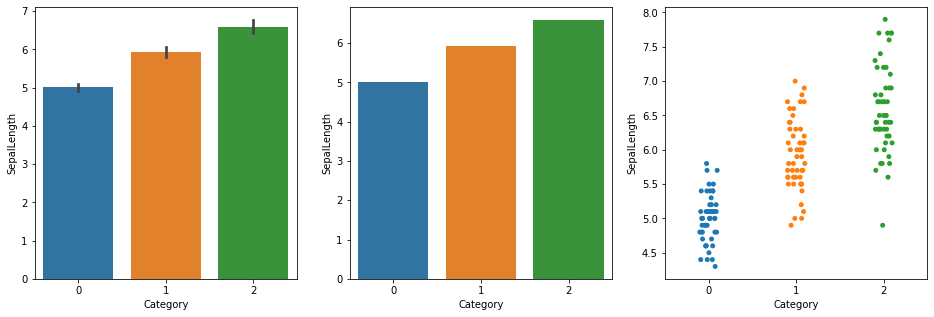

In [10]:
iris_df = pd.concat([df,cg],axis=1)
mean=iris_df.groupby('Category')['SepalLength'].mean().reset_index()
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
sns.barplot(data=iris_df,x='Category',y='SepalLength',ax=ax1)
sns.barplot(data=mean, x="Category", y="SepalLength",ax=ax2)
sns.stripplot(data=iris_df,x='Category',y='SepalLength',ax=ax3)

When we have more than one categorical variables, we can use stacked or grouped bar plot. To make the tutorial easy to understand, we binned the features of iris and look at the result. The use of stacked bar plot on Python is not very convenient so we didn't mention it here.

In [11]:
bins=[4,6,8]
labels=np.arange(0,len(bins)-1)
iris_df['binned_SepalLength']=pd.cut(df['SepalLength'],bins,labels=labels)

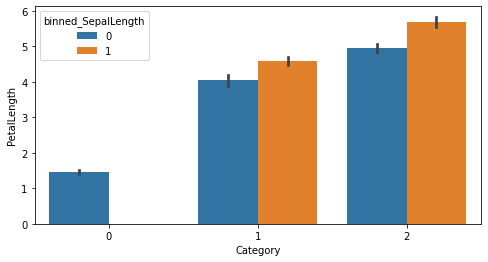

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(data=iris_df,x='Category',y='PetalLength',hue='binned_SepalLength')

Actually, we can use 'sns.catplot' function to implement any plot with catrgorical variable as x-axis by changing the parameter 'kind'. This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations and the kind parameter selects the underlying axes-level function to use. Take bar plot as an example, it has the same plot as 'sns.barplot'.

Pay attention to the use of subplots here. Catplot is a figure-level function and does not accept target axes. 

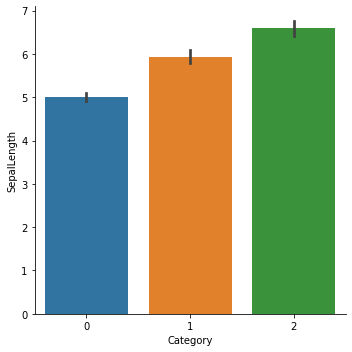

In [13]:
sns.catplot(data=iris_df,x='Category',y='SepalLength',kind='bar')

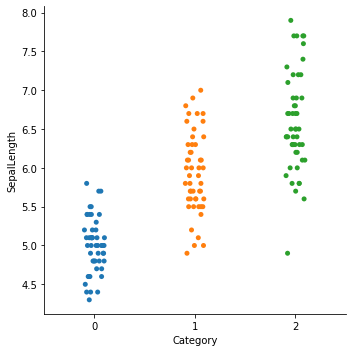

In [14]:
sns.catplot(data=iris_df,x='Category',y='SepalLength',kind='strip')

Mosaic plot is a special type of stacked bar chart for categorical variables. We use the statmodels package in python to implement it.(There are not convenient API in matplotlib/seaborn, but using FacetGrid() in matplotlib can also draw a mosaic plot.) The data are created randomly.

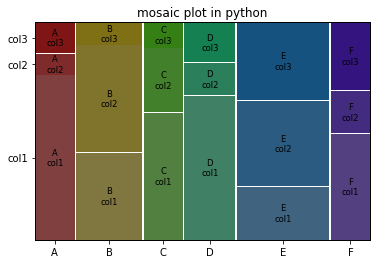

In [15]:

data = [80, 10, 15, 70, 86, 18, 60, 30, 12, 90, 20, 25, 60, 96, 88, 50, 20, 32]
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
tuples = list(product(["A","B","C","D","E","F"], ['col1', 'col2','col3']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series(data, index=index)
mosaic(data, title='mosaic plot in python')
plt.show()
                  

The following is Cleveland dot plot in python. we use part of the tophit dataset in r.gcookbook package.

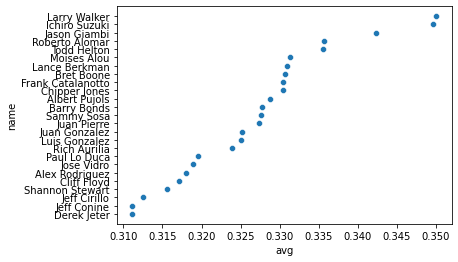

In [16]:
data = pd.read_csv("tophit.csv")
data = data[:25]
fig = sns.scatterplot(y="name", x="avg", data = data)

Parallel coordinates plot are used to show the relationship between different variables. The following plot clearly shows the relationship in iris dataset. We use the API in pandas to implement it.

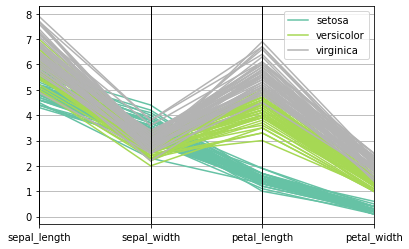

In [17]:
from pandas.plotting import parallel_coordinates
iris = sns.load_dataset('iris')
parallel_coordinates(iris, 'species', colormap=plt.get_cmap("Set2"))

The following is contour plot in python. We still use the iris dataset. Contour plot is a graphical method to visualize the 3-D surface by plotting constant Z slices called contours in a 2-D format.

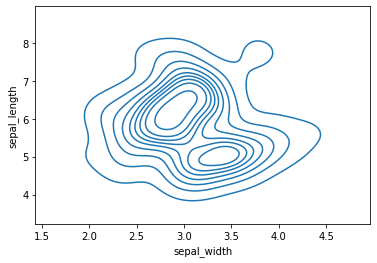

In [21]:
sns.kdeplot(x=iris.sepal_width, y=iris.sepal_length)
plt.show()


Alluvial plot is another plot method to reveal the relationship between categorical variables. We use the vaccinations dataset in r.ggalluvial package to illustrate it. 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
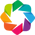

:Sankey   [survey,response]   (freq,subject,start_date,end_date)

In [23]:
import holoviews as hv
from holoviews import opts, dim
data = pd.read_csv("vaccinations.csv")
hv.extension('bokeh')
sankey = hv.Sankey(data,kdims=["survey", "response"])
sankey.opts(width=600, height=400)

# Reference
https://en.wikipedia.org/wiki/Iris_flower_data_set

http://seaborn.pydata.org/generated/seaborn.catplot.html

https://r-charts.com/distribution/cleveland-dot-plot/

https://holoviews.org/reference_manual/holoviews.element.html?highlight=sankey#holoviews.element.sankey.Sankey